# Tarea 1 de Astronomía Galáctica.

El link que se usó para esta tarea es: https://www.legacysurvey.org/viewer/fits-cutout?ra=122.5903&dec=33.9570&layer=ls-dr10&pixscale=0.262&bands=grz&size=1024

Cuyas coordenadas son:

RA = 122.5903 y Dec = 33.9570

Primero se empieza instalando los paquetes correspondientes

In [1]:
pip install photutils

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Se importan las siguientes librerías y funciones

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from photutils.segmentation import detect_sources,detect_threshold,deblend_sources,SourceCatalog
from photutils.isophote import EllipseGeometry,Ellipse
from photutils.aperture import EllipticalAperture

No estamos incluyendo los paquetes que trabajan con Background, puesto que estamos
trabajando con imágenes que ya fueron procesadas con el ruido reducido y podemos trabajar con ellas 
tranquilamente.

## 1.- Generando y trabajando con el catálogo

In [3]:
# Se abren los archivos .fit y se leen cada uno de ellos
Imagen_1 = fits.open('Imagen de trabajo.fits')
Imagen_1.info()

Filename: Imagen de trabajo.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (1024, 1024, 3)   float32   


In [4]:
# Lo que hacemos es extraer los datos de la imagen en cuestión.

image_data = Imagen_1[0].data 
print(type(image_data))
print(image_data.shape)


<class 'numpy.ndarray'>
(3, 1024, 1024)


In [5]:
# Separamos la imagen en distinos filtros, para el filtro g
# r y z, y definimos una variable para después echarle un vistazo
# la imagen.

Imagen_Uno = np.array(Imagen_1[0].data)
Vistazo_de_Imagen = np.mean(Imagen_Uno,axis=0)
Imagen_Filtro_g = Imagen_Uno[0,:,:]
Imagen_Filtro_r = Imagen_Uno[1,:,:]
Imagen_Filtro_z = Imagen_Uno[2,:,:]


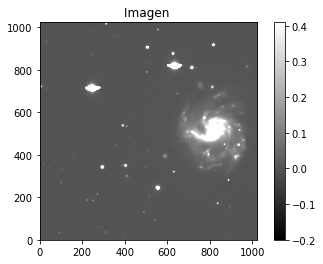

In [6]:
# Graficamos la imagen para echarle un vistazo.

plt.imshow(Vistazo_de_Imagen, cmap='gray',origin='lower', vmax=np.mean(Vistazo_de_Imagen)+np.std(Vistazo_de_Imagen), vmin=-0.2)
plt.colorbar()
plt.title('Imagen ')
plt.show()

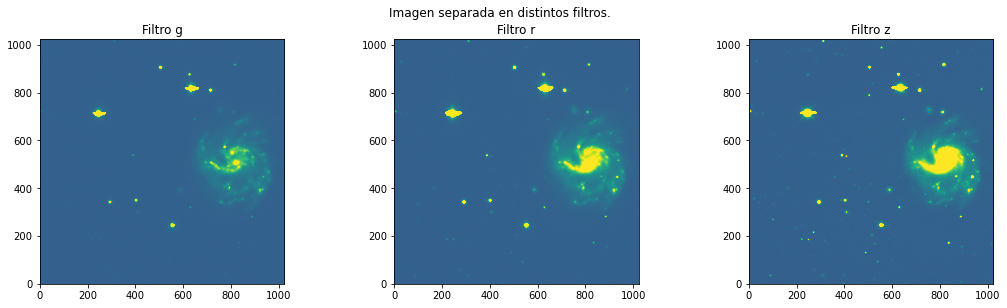

In [7]:
# Graficamos la imagen vista en los filtros correspondientes.


fig,ax=plt.subplots(1,3,figsize=(18,4.5))
ax[0].imshow(Imagen_Filtro_g, origin='lower',vmax=0.45, vmin=-0.2)
ax[0].set_title('Filtro g')
ax[1].imshow(Imagen_Filtro_r, origin='lower',vmax=0.45, vmin=-0.2)
ax[1].set_title('Filtro r')
ax[2].imshow(Imagen_Filtro_z, origin='lower',vmax=0.45, vmin=-0.2)
ax[2].set_title('Filtro z')
fig.suptitle('Imagen separada en distintos filtros.')
plt.show()

In [8]:
# En esta celda detectamos las fuentes para cada filtro,
# cuyas fuentes detectadas varía un poco en cada uno.


Fuentes_g = detect_threshold(Imagen_Filtro_g,3)
Fuentes_r = detect_threshold(Imagen_Filtro_r,3)
Fuentes_z = detect_threshold(Imagen_Filtro_z,3)
Segmento_g = detect_sources(Imagen_Filtro_g,Fuentes_g , npixels=10)
Segmento_r = detect_sources(Imagen_Filtro_r,Fuentes_r , npixels=10)
Segmento_z = detect_sources(Imagen_Filtro_z,Fuentes_z , npixels=10)
print(Segmento_g)
print(Segmento_r)
print(Segmento_z)

<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 126
labels: [  1   2   3   4   5 ... 122 123 124 125 126]
<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 152
labels: [  1   2   3   4   5 ... 148 149 150 151 152]
<photutils.segmentation.core.SegmentationImage>
shape: (1024, 1024)
nlabels: 141
labels: [  1   2   3   4   5 ... 137 138 139 140 141]


Text(0.5, 1.0, 'Imagen z')

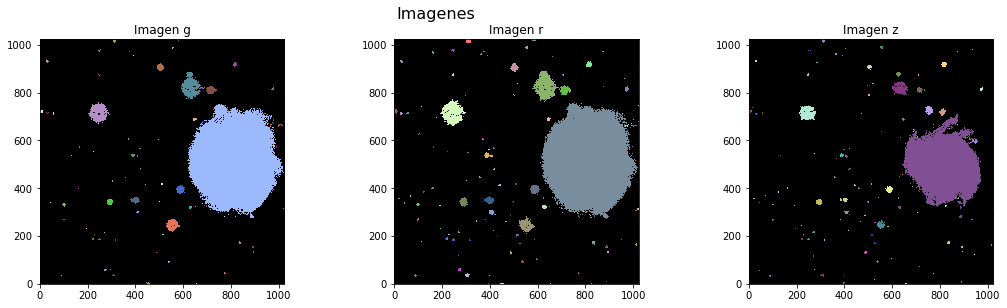

In [9]:
# Generamos un gráfico para ilustrar las fuentes para cada filtro.

fig,ax=plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle('Imagenes',x=0.45,fontsize=16)
ax[0].imshow(Segmento_g,origin='lower', cmap=Segmento_g.cmap,
           interpolation='nearest')
ax[0].set_title('Imagen g')
ax[1].imshow(Segmento_r, origin='lower', cmap=Segmento_r.cmap,
           interpolation='nearest')
ax[1].set_title('Imagen r')
ax[2].imshow(Segmento_z, origin='lower', cmap=Segmento_z.cmap,
           interpolation='nearest')
ax[2].set_title('Imagen z')


Como hay fuentes que se mezclan en las imágenes, separaremos esto usando la funcion deblend_sources

In [10]:
Segmentos_Separados_g = deblend_sources(Imagen_Filtro_g,Segmento_g,npixels=7, nlevels=32, contrast=0.45,
                               progress_bar=False)
Segmentos_Separados_r = deblend_sources(Imagen_Filtro_r,Segmento_r,npixels=7, nlevels=32, contrast=0.43,
                               progress_bar=False)
Segmentos_Separados_z = deblend_sources(Imagen_Filtro_z,Segmento_z,npixels=7, nlevels=32, contrast=0.67,
                               progress_bar=False)
# Imagen separadas en cada filtro, que le aplicamos la función deblend_sources
# que básicamente separa las fuentes o las 'desmezcla'

Text(0.5, 1.0, 'Imagen z')

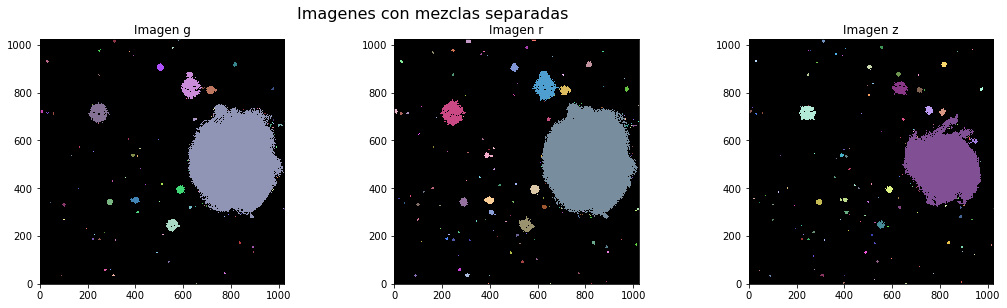

In [11]:
# Graficamos las fuentes para ilustrar las fuentes

fig,ax=plt.subplots(1,3,figsize=(18,4.5))
fig.suptitle('Imagenes con mezclas separadas ',x=0.45,fontsize=16)
ax[0].imshow(Segmentos_Separados_g,origin='lower', cmap=Segmento_g.cmap,
           interpolation='nearest')
ax[0].set_title('Imagen g')
ax[1].imshow(Segmentos_Separados_r, origin='lower', cmap=Segmento_r.cmap,
           interpolation='nearest')
ax[1].set_title('Imagen r')
ax[2].imshow(Segmentos_Separados_z, origin='lower', cmap=Segmento_z.cmap,
           interpolation='nearest')
ax[2].set_title('Imagen z')


In [59]:
# Generamos un catálogo para las fuentes detectadas en el filtro g:
Catálogo_Fuentes_g = SourceCatalog(Imagen_Filtro_g,Segmentos_Separados_g)
tabla_g = Catálogo_Fuentes_g.to_table()
tabla_g

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,452.491152625678,1.415748973202147,None,444,460,0,6,70.0,3.637017537746362,1.3916539792628375,-9.867150717923902,0.9238991626486335,0.007426094729453325,0.04543561860918999,0.0,1.104218756314367,nan,1.7292483372656888,nan
2,654.2459738966063,0.8144110674636404,None,652,656,0,2,13.0,1.3592427004395555,0.7215542808198964,11.967835272020794,0.8474656620836519,0.007991079241037369,0.011208787560462952,0.0,0.11982929147779942,nan,0.31886342335949475,nan
3,306.5767193920781,36.13421499019355,None,300,313,30,41,75.0,3.1537627481973334,2.073888737309234,-7.176482886557181,0.7533743657269867,0.007505175657570362,0.017022013664245605,0.0,0.7965172273106873,nan,2.0588820397317957,nan
4,89.53309907709536,34.948863397959705,None,86,93,33,37,28.0,1.7882956876135054,1.1585789313348067,-9.53553297358276,0.7617529148169693,0.0076489998027682304,0.016613248735666275,0.0,0.31032180320471525,nan,0.7826677976701926,nan
5,770.938266955828,44.63537212314452,None,766,775,40,49,70.0,1.9994954825119458,1.8296498500220333,-16.165723850910567,0.40332736545941644,0.007487989030778408,0.06232653185725212,0.0,1.5942624378949404,nan,2.147149833617506,nan
6,272.83668324473416,58.916027004059096,None,267,280,54,64,96.0,3.1971832303396788,1.8672054004498428,32.8402449652388,0.8117423173405178,0.0074195247143507,0.03486357256770134,0.0,1.713344362564385,nan,2.33043374319458,nan
7,292.8420871979709,61.45775359639997,None,291,295,60,63,12.0,1.375355271585198,0.6692193329397521,-33.77269120494304,0.8736364438431048,0.007497634273022413,0.010928383097052574,0.0,0.11040169652551413,nan,0.3866490607395592,nan
8,537.3189674835197,92.70087080383499,None,532,543,87,97,85.0,2.4223863131826877,2.0624482797676382,7.605912582753199,0.5244978120628763,0.007389634847640991,0.04600949585437775,0.0,1.57094956189394,nan,2.2910117086308155,nan


In [60]:
#Generamos una tabla de catalogo para las fuentes detectadas en la imagen del filtro r.
Catálogo_Fuentes_r = SourceCatalog(Imagen_Filtro_r,Segmentos_Separados_r)
tabla_r = Catálogo_Fuentes_r.to_table()
tabla_r

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,452.3794572889015,1.3851946007312224,None,444,461,0,5,75.0,3.8662087557912836,1.3662259882864158,-6.437059009860072,0.9354813158979614,0.01044074073433876,0.07157867401838303,0.0,1.789275356568396,nan,2.8757301814555545,nan
2,654.4482046031839,1.0994229717090942,None,652,657,0,3,16.0,1.2408677892649693,0.9204913580591897,-22.42686037344065,0.6706072397539469,0.011040713638067245,0.025904720649123192,0.0,0.27912983763962984,nan,0.6645465483299559,nan
3,394.63921301420646,4.128607433345471,None,391,399,2,6,29.0,1.886530974868007,1.201744486855008,-4.338107886486393,0.7708531763702476,0.010662785731256008,0.026512406766414642,0.0,0.4795800931751728,nan,1.16209294625025,nan
4,822.8723230500123,3.5291286069618,None,821,825,2,6,19.0,1.3548853118612616,0.9699314918349246,-34.33625831561851,0.6982262145726147,0.010465582832694054,0.024885905906558037,0.0,0.321996184065938,nan,0.7402655999833658,nan
5,886.9730887429068,9.335417183834302,None,885,890,7,12,25.0,1.3829005247839163,1.2429792826619253,-48.35018995836433,0.43831699121898826,0.01103619672358036,0.025781167671084404,0.0,0.42619258165359497,nan,0.9354523501516878,nan
6,306.9197936357539,36.152224316257794,None,297,316,27,43,213.0,4.429399246441675,3.247847693852017,3.12125251118308,0.679961409024344,0.01056842040270567,0.04819328710436821,0.0,4.590761153027415,nan,6.499284930796794,nan
7,89.38223818329709,34.86610684953754,None,85,95,31,39,82.0,2.4255458520831468,1.914554033603249,-12.167453702038308,0.6139702768379317,0.010437892749905586,0.06631489843130112,0.0,1.9913515131920576,nan,2.7345264621703924,nan
8,397.5813833246258,36.80632621792676,None,395,401,34,40,25.0,2.0515417168065273,0.9963167376570897,-34.15835405419358,0.8741572748022252,0.010521509684622288,0.01909628137946129,0.0,0.34332090243697166,nan,1.1494687381464332,nan


In [14]:
#Lo mismo para el filtro z

Catálogo_Fuentes_z = SourceCatalog(Imagen_Filtro_z,Segmentos_Separados_z)
tabla_z = Catálogo_Fuentes_z.to_table()
tabla_z

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,654.1075964903351,1.3567285943125322,None,651,658,0,3,23.0,1.6345019821800475,0.9982292606260701,-4.255299124483848,0.7918436972594982,0.03665001690387726,0.08773676306009293,0.0,1.390695571899414,nan,2.110331276024855,nan
2,394.93708284433757,4.267652359047352,None,390,399,1,7,50.0,1.9560479661050258,1.547635884262708,-5.800981494131403,0.611550387800645,0.0367315448820591,0.1714337170124054,0.0,4.056002106517553,nan,5.400533340079409,nan
3,887.1085040330883,9.151046229209413,None,883,890,6,12,44.0,1.649894404802016,1.4251291000765085,28.70013629036516,0.5038864812623789,0.0365651473402977,0.26508060097694397,0.0,4.319884404540062,nan,5.336892850744776,nan
4,524.64607547998,17.49542872512715,None,522,529,15,21,29.0,1.4303989748291623,1.3516483356074322,-29.34188195246776,0.3272292441678833,0.037022706121206284,0.16867557168006897,0.0,2.2684765458106995,nan,2.9949179023165646,nan
5,306.66563240123077,35.75411786510477,None,298,314,28,42,141.0,3.7799810153407383,2.9482442793823957,-17.22705826274001,0.6258259768512878,0.03708239272236824,0.13723748922348022,0.0,9.451781582087278,nan,14.494190342075093,nan
6,88.87324258718772,34.842171935336246,None,84,93,31,39,62.0,1.7806189778953794,1.6147288408475347,-0.07846560191588867,0.42148431752028503,0.03661349043250084,0.5028820037841797,0.0,9.046251934021711,nan,10.514213567411431,nan
7,397.8410200557693,36.771099956567134,None,395,400,34,39,24.0,1.4485973173775775,1.182702783243502,-25.266872709145243,0.5774205279568065,0.03649917244911194,0.08916281908750534,0.0,1.39554088935256,nan,2.9604611875020765,nan
8,771.2262039949131,44.561922644049176,None,769,773,43,47,19.0,1.1773671219242767,1.0682676782397864,44.73112103872595,0.42040602265635474,0.03756624460220337,0.10724284499883652,0.0,1.2510367445647717,nan,1.9769221669638086,nan


In [99]:
# Para detectar las fuentes en la imagen en general y no en los filtros por separado
# y que todas las tablas tengan las mismas dimensiones para no tener problemas


#image_data = Imagen_1[0].data 
threshold = 1.5*np.mean(image_data) #aplicamos la operación valor medio
Mapa_segmentado_general = detect_sources(np.mean(image_data,axis=0), threshold, npixels=10)
Mapa_deblending_general = deblend_sources(np.mean(image_data,axis=0), Mapa_segmentado_general,
                                          nlevels=32,npixels=8,progress_bar=False)

Catálogo_general_g= SourceCatalog(Imagen_Filtro_g,Mapa_deblending_general)
Catálogo_general_r= SourceCatalog(Imagen_Filtro_r,Mapa_deblending_general)
Catálogo_general_z= SourceCatalog(Imagen_Filtro_z,Mapa_deblending_general)

Tabla_general_g = Catálogo_general_g.to_table()
Tabla_general_r = Catálogo_general_r.to_table()
Tabla_general_z = Catálogo_general_z.to_table()
#Ahora todas las imagenes tendran las mismas dimensiones y podremos hacer operaciones facilmente.

In [83]:
Tabla_general_g

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,887.5546789305066,9.42783013245615,None,886,889,8,11,12.0,1.0004876692347917,0.8965038631476456,0.15526009011894581,0.4439190788208108,0.0019489122787490487,0.006007806863635778,0.0,0.05102163611445576,nan,0.38625806962749665,nan
2,88.97595788589418,34.96088336717567,None,87,91,33,37,24.0,1.3227483909961473,1.2420617642089304,-14.760799270869807,0.34391502532420737,0.004858975764364004,0.016613248735666275,0.0,0.26457411563023925,nan,0.703435423357442,nan
3,306.2274814033438,36.644555515508586,None,303,309,35,39,21.0,1.5339385317443264,1.0699246713042705,3.6733550513234148,0.7165831669379281,0.008930896408855915,0.017022013664245605,0.0,0.28437138721346855,nan,1.7490359732400993,nan
4,771.1799441341892,44.556847755158365,None,770,772,43,46,10.0,0.9582143124740575,0.7441689193535226,88.66465554398246,0.6299686759622413,0.03745521977543831,0.06232653185725212,0.0,0.5082445181906223,nan,1.8417003395618374,nan
5,537.4737783266011,92.88074062741266,None,534,542,90,96,45.0,1.9172877842003107,1.522012696592022,-12.198722993963505,0.6081314680834788,0.011789260432124138,0.04600949585437775,0.0,1.1535177901387215,nan,2.1729374521325457,nan
6,487.5777506012566,131.2306890916186,None,484,491,128,134,44.0,1.6641639337188083,1.4824313105584428,-16.469073192505938,0.4544025742209535,0.003286499297246337,0.040342457592487335,0.0,0.7835977778304368,nan,1.294902304466366,nan
7,889.1885864123101,155.40007210125788,None,887,891,153,158,23.0,1.3978282885846276,1.182423323578687,82.70651354729678,0.5333411075707587,0.016238505020737648,0.0341557040810585,0.0,0.6042201779782772,nan,1.8747510114874748,nan
8,525.6305400258624,169.018518217931,None,524,528,167,171,17.0,1.1720528770066636,1.104885172586365,-71.02677316090404,0.33366346453661283,0.0044936067424714565,0.007710171397775412,0.0,0.10393785638734698,nan,0.36417742838573974,nan


In [84]:
Tabla_general_r

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,887.2282435541578,9.276109518036634,None,886,889,8,11,12.0,0.9916879293619298,0.8905319343491688,18.720382436891285,0.44000332893142496,0.01379363052546978,0.025781167671084404,0.0,0.2469562068581581,nan,0.8539898055543771,nan
2,88.9420550573489,34.910908459574806,None,87,91,33,37,24.0,1.3252076035842482,1.2317548562186282,-42.85031485572062,0.36887081363612173,0.026547743007540703,0.06631489843130112,0.0,1.040554940700531,nan,2.546189947804832,nan
3,306.13083208745235,36.63264156283551,None,303,309,35,39,21.0,1.5110709446901298,1.087966978558445,1.6853708249197548,0.6939768790800153,0.02926725521683693,0.04819328710436821,0.0,0.8524010442197323,nan,5.466138932298655,nan
4,771.1682513961094,44.51462505377096,None,770,772,43,46,10.0,0.9726243221129898,0.7473804175260197,-88.6112981401979,0.6399502599134423,0.043802596628665924,0.062248360365629196,0.0,0.5235196799039841,nan,1.8837979903691666,nan
5,537.6002260609771,92.87620686388452,None,534,542,90,96,45.0,1.95895534303487,1.5456457747974042,-9.103639406972,0.6143735235661253,0.03705073893070221,0.10053279250860214,0.0,2.9167285300791264,nan,5.680767852979688,nan
6,487.4699524604491,131.20878297926274,None,484,491,128,134,44.0,1.6869159903942577,1.524545900786992,-11.470179810708155,0.4280662090967806,0.0227508582174778,0.13517433404922485,0.0,3.0008926931768656,nan,4.463218963456093,nan
7,889.2198849785659,155.36825506762005,None,887,891,153,158,23.0,1.4308565527143842,1.190799557319913,79.88357764998197,0.5544328421348532,0.04457864537835121,0.06902103871107101,0.0,1.3594769276678562,nan,4.1121014532921905,nan
8,525.6078699675535,169.06656184105924,None,524,528,167,171,17.0,1.1347569164806577,1.0863388145523307,-89.5316323544238,0.2889912412662614,0.018148792907595634,0.031017059460282326,0.0,0.4136383906006813,nan,1.2367709866160521,nan


In [85]:
Tabla_general_z

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,887.3167721395674,9.204753184808654,None,886,889,8,11,12.0,0.9558791496005644,0.8671330114712608,23.108152109511472,0.4207910810365627,0.1262979954481125,0.26508060097694397,0.0,2.2550496011972427,nan,5.191005298758159,nan
2,88.89763956454412,34.89277491580208,None,87,91,33,37,24.0,1.242295809529983,1.1941035591827427,-35.12783146376667,0.2758276643942349,0.12327072024345398,0.5028820037841797,0.0,6.483315527439117,nan,10.07468134561202,nan
3,306.160909040167,36.60948017787514,None,303,309,35,39,21.0,1.5320714078361586,1.1186537542309296,1.8313547917603197,0.6832786511841467,0.10053417831659317,0.13723748922348022,0.0,2.4707885831594467,nan,12.561296615119119,nan
4,771.2084626467703,44.53771614420889,None,770,772,43,46,10.0,0.9643407287476139,0.7287156658087852,87.12543707344933,0.6549617601140652,0.06459492444992065,0.10724284499883652,0.0,0.8420523479580879,nan,1.958952992391935,nan
5,537.6559129740772,92.87292225614857,None,534,542,90,96,45.0,1.9127489859085955,1.491094566459874,-5.810303394849114,0.6263327823429552,0.09168399125337601,0.3163006603717804,0.0,7.657097563147545,nan,11.798376119381576,nan
6,487.4858658691195,131.21053229387562,None,484,491,128,134,44.0,1.5490271710127088,1.4262708687933303,0.017499480811320755,0.3901468468171801,0.12107072025537491,1.0511153936386108,0.0,16.97383128851652,nan,20.205285623398105,nan
7,889.2533519431936,155.3983390948857,None,887,891,153,158,23.0,1.414682829095331,1.10849991177409,78.57156845930025,0.6213062877159174,0.0777529925107956,0.18155483901500702,0.0,2.8500426337122917,nan,6.961380841455869,nan
8,525.6163729929007,169.0371572675721,None,524,528,167,171,17.0,1.0667327248196141,1.0506269717407284,89.94430507305941,0.17311401177791375,0.1224571168422699,0.3378162682056427,0.0,3.8277958929538727,nan,6.679604309261802,nan


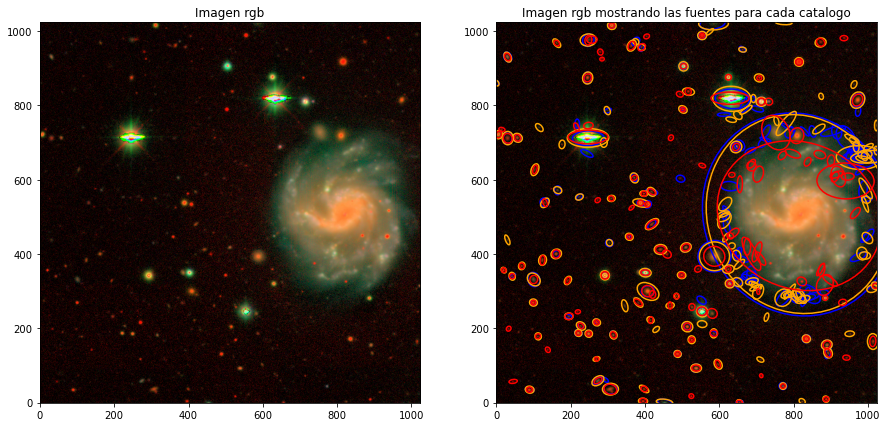

In [58]:
# Usando las imágenes de los filtros en el orden correspondiente, generamos la imagen rgb usando
# la función make_lupton_rgb. 

# make_lupton_rgb lo que hace es generar una imagen rgb a partir de 3 imagenes, usando
# un parámetro de estiramiento (Q) en asinh.

Imagen_rgb = make_lupton_rgb(Imagen_Filtro_z,
                           Imagen_Filtro_r,Imagen_Filtro_g,minimum=0, stretch=0.066, Q=8)
fig,ax = plt.subplots(1,2, figsize = (15,15))
ax[0].imshow(Imagen_rgb,origin='lower', vmin = 0, vmax =np.mean(Imagen_rgb)+np.std(Imagen_rgb))
ax[0].set_title('Imagen rgb')
ax[1].imshow(Imagen_rgb,origin='lower', vmin = 0, vmax =np.mean(Imagen_rgb)+np.std(Imagen_rgb))
ax[1].set_title('Imagen rgb mostrando las fuentes para cada catalogo')
Catálogo_Fuentes_g.plot_kron_apertures(color='blue', lw=1.5) # Para el catálogo g se escoge el color azul
Catálogo_Fuentes_r.plot_kron_apertures(color='orange', lw=1.5) # Para el catálogo r se escoge el color naranjo
Catálogo_Fuentes_z.plot_kron_apertures(color= 'red', lw=1.5) # Para el catálogo z se escoje el color rojo
plt.show()

# Graficamos una imagen rgb del objeto escogido, mientras ilustramos las fuentes detectadas
# en cada filtro en la imagen rgb

En general podemos ver al ojo que hay objetos que no se les graficó todas las fuentes, puesto que no todas las fuentes fueron detectadas en los distintos filtros.


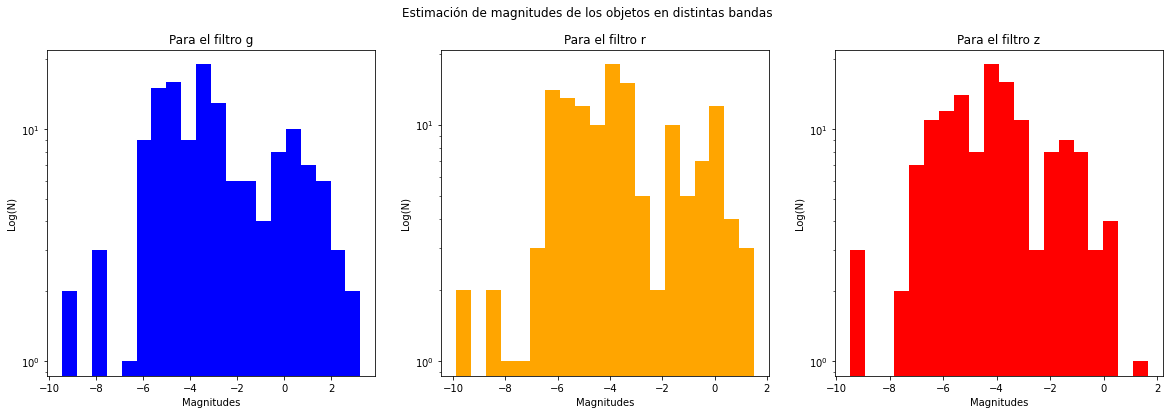

In [97]:
# Ahora analizaremos las magnitudes de estos objetos

Magnitud_absoluta_g= (-1)*2.5*np.log10(Tabla_general_g['segment_flux'])
Magnitud_absoluta_r= (-1)*2.5*np.log10(Tabla_general_r['segment_flux'])
Magnitud_absoluta_z= (-1)*2.5*np.log10(Tabla_general_z['segment_flux'])

# Se extraen los datos de las magnitudes de las tablas

fig,ax = plt.subplots(1,3, figsize=(20,6))
ax[0].hist(Magnitud_absoluta_g,bins=20,color='blue', log=True)
ax[0].set(xlabel='Magnitudes',ylabel='Log(N)',title='Para el filtro g')
ax[1].hist(Magnitud_absoluta_r,bins=20,color='orange', log=True)
ax[1].set(xlabel='Magnitudes',ylabel='Log(N)',title='Para el filtro r')
ax[2].hist(Magnitud_absoluta_z,bins=20,color='red', log=True)
ax[2].set(xlabel='Magnitudes',ylabel='Log(N)',title='Para el filtro z')
fig.suptitle('Estimación de magnitudes de los objetos en distintas bandas')
plt.show()

# Se grafica los valores de la estimacion de magnitudes 

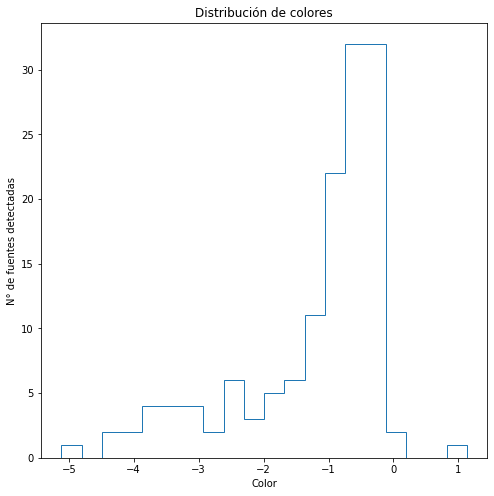

In [95]:
# Para el color se restan los filtros z y g

#image_data = Imagen_1[0].data 
threshold = 1.5*np.mean(image_data)

Colores = Magnitud_absoluta_z -Magnitud_absoluta_g

plt.figure(figsize=(8,8))
plt.hist(Colores, bins = 20, histtype='step')
plt.xlabel('Color')
plt.ylabel('N° de fuentes detectadas')
plt.title('Distribución de colores')
plt.show()

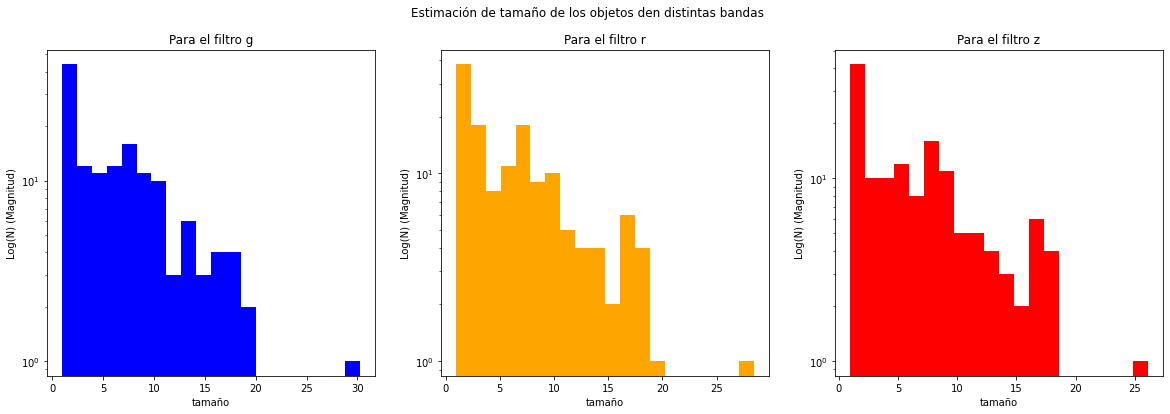

In [61]:
# Para hacer una estimación del tamaño de los objetos en la imagen, usaremos
# los datos del semieje mayor para cada tabla

Tamaño_de_objetos_para_g = Tabla_general_g['semimajor_sigma'].value
Tamaño_de_objetos_para_r = Tabla_general_r['semimajor_sigma'].value
Tamaño_de_objetos_para_z = Tabla_general_z['semimajor_sigma'].value


# Graficamos las distribuciones de color para cada tabla y para cada filtro
# mediante un grafico de barras.

fig,ax = plt.subplots(1,3, figsize=(20,6))
ax[0].hist(Tamaño_de_objetos_para_g,bins=20,color='blue', log=True)
ax[0].set(xlabel='tamaño',ylabel='Log(N) (Magnitud)',title='Para el filtro g')
ax[1].hist(Tamaño_de_objetos_para_r,bins=20,color='orange', log=True)
ax[1].set(xlabel='tamaño',ylabel='Log(N) ',title='Para el filtro r')
ax[2].hist(Tamaño_de_objetos_para_z,bins=20,color='red', log=True)
ax[2].set(xlabel='tamaño',ylabel='Log(N)',title='Para el filtro z')
fig.suptitle('Estimación de tamaño de los objetos den distintas bandas')
plt.show()


## Isofótas

Acá se elijen un total de nueve objetos en filtros específicos para graficarle las isofotas.

In [23]:
# Nos acercamos al objeto que queremos observar
Objeto1 = Imagen_Filtro_z[300:770,600:1000]

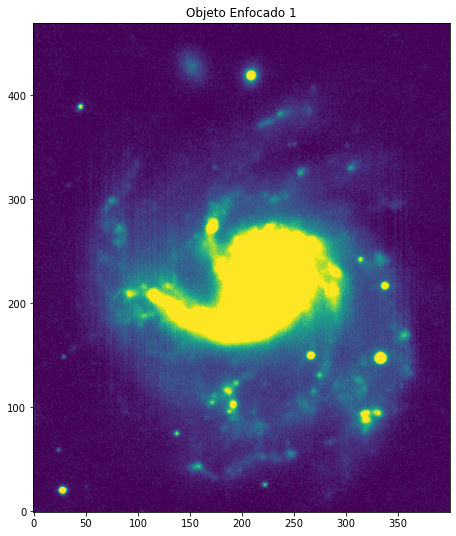

In [24]:
# Se grafica el objeto en acercamiento.
plt.figure(figsize=(9,9))
plt.imshow(Objeto1, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 1')
plt.show()

(<matplotlib.patches.Ellipse at 0x1dafdff4d30>,)

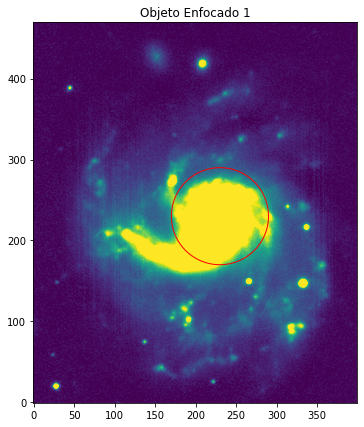

In [27]:
# Las variables que se definen dentro de la funcion EllipseGeometry son:
# sma = es el tamaño de la figura.
# eps = es la exentricidad.
# es el ángulo de 

Elipse = EllipseGeometry(x0=230, y0=230, sma=60, eps=0.001,
                           pa=30.0 * np.pi / 180.0)

aper = EllipticalAperture((Elipse.x0, Elipse.y0), Elipse.sma,
                          Elipse.sma * (1 - Elipse.eps),
                          Elipse.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto1, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 1')

aper.plot(color="red")

# Graficamos y centramos una elipse de excentricidad 0.001 
# para ver en que lugar geometrico se generaran las isofótas

In [75]:
def Isofotas(Objeto,Formas):
    '''
    Esta función forma una lista de isofótas para 
    los objetos que elijamos en el futuro.
    '''
    return Ellipse(Objeto,Formas).fit_image()
def Aperturas(g,y):
    '''
    Se define esta función para graficar las isofotas 
    de los objetos que elejimos
    '''
    return EllipticalAperture((g.x0[y], g.y0[y]), g.sma[y],
                          g.sma[y] * (1 - g.eps[y]),
                          g.pa[y])
Isofota_Imagen_1 = Isofotas(Objeto1,Elipse) # Se define la lista de isofotas para la imagen 1
Isofota_Imagen_1.to_table() # Generamos la tabla para poder ver el número de isofótas



sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int32,int32,int32,int32
0.0,15.074102559023519,0.0,0.0,0.0,0.0,0.0,0.0,None,None,219.90277738454805,0.0,206.33558021548836,0.0,1,0,0,0
0.5111130767700377,14.988368492940863,0.01348965489933874,0.5933734704424368,0.0794143052833736,89.3613856823541,5.633412431896845,-0.4802488817848914,0.4171827593418698,0.8686803346451735,219.90277738454805,0.020948159381786065,206.33558021548836,0.049959141482136774,13,0,10,0
0.5622243844470415,14.96879571553318,0.014814162944147578,0.5864730218092,0.07996649725326538,88.88184165392907,5.711197884806557,-0.48424607968595795,0.417469853612117,0.8621027017562094,219.8919877026454,0.02322572296393703,206.36795615432902,0.05437175482867943,13,0,10,0
0.6184468228917457,14.931202054750637,0.017014142522262327,0.5260311825771158,0.07271225460434502,86.59815028365698,5.55249881897435,-0.6353991680289617,0.4370201497207244,0.6877883568472108,219.8597251653734,0.023337907596414548,206.39870958168183,0.04741830945247701,13,0,12,0
0.6802915051809203,14.823198187694345,0.019554840769446486,0.2980556847634993,0.07707989982474375,84.16362821577695,8.996506956824556,-0.9264950252085735,0.42384171360566475,0.45746787848132164,219.78995222914193,0.02718916202440474,206.41697552404784,0.037292366862314845,13,0,15,0
0.7483206556990124,14.695364859493914,0.02457352062781166,0.0794017602698051,0.080600713438055,63.37027726103047,31.2932390089403,-1.3294109326892047,0.4707214397565687,0.35408272053575474,219.7185413851663,0.03146814851396284,206.43308273341418,0.032460601332699714,13,0,10,0
0.8231527212689137,14.57851358635432,0.01868670204920931,0.06429654336414141,0.05253583291014716,46.352459100137565,24.96229974393385,-1.4365145349342983,0.33026258660186214,0.22990549595585355,219.70309733200097,0.02272604218385874,206.432653149216,0.02276345480714147,13,0,10,0
0.9054679933958051,14.46854200233421,0.020758637289888963,0.07137056951360585,0.04884837630203009,42.955662086545466,20.660156050402826,-1.5478306035474358,0.31423460687810806,0.20301614799314685,219.70912859806646,0.023401672933180892,206.4308558504382,0.02333380872010917,13,0,10,0


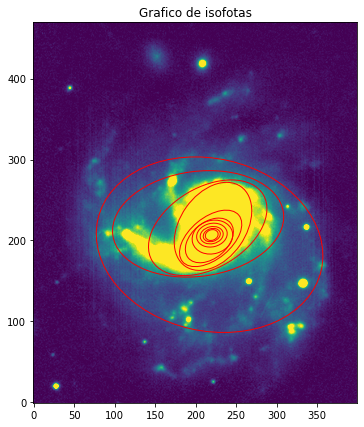

In [63]:
plt.figure(figsize=(7,7))
plt.imshow(Objeto1, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas')

for i in range(30,62,3): # el rango corresponde a: (isofota n° 30, isofota n°62, 3 isofotas por numero)
    Aperturas(Isofota_Imagen_1,i).plot(color='red')

# Graficamos las isofotas en función de las listas de isofotas en 
# para el primer objeto

In [30]:
# Se acerca el segundo objeto que queremos observar.
Objeto2 = Imagen_Filtro_g[560:590,755:790]

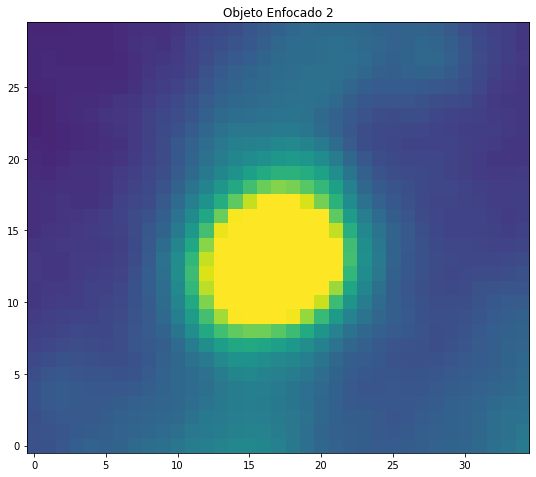

In [31]:
# Graficamos el segundo objeto para ilustrarlo.
plt.figure(figsize=(9,9))
plt.imshow(Objeto2, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_g)+np.std(Imagen_Filtro_g))
plt.title('Objeto Enfocado 2')
plt.show()

(<matplotlib.patches.Ellipse at 0x1dafc7639d0>,)

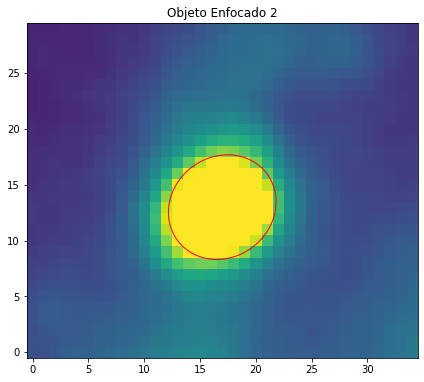

In [32]:
# Repetimos el proceso de generar una elipse
# de ensayo.

Elipse2 = EllipseGeometry(x0=17, y0=13, sma=5, eps=0.1,
                           pa=37.0 * np.pi / 180.0)

aper2 = EllipticalAperture((Elipse2.x0, Elipse2.y0), Elipse2.sma,
                          Elipse2.sma * (1 - Elipse2.eps),
                          Elipse2.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto2, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_g)+np.std(Imagen_Filtro_g))
plt.title('Objeto Enfocado 2')

aper2.plot(color="red")


In [64]:
Isofota_imagen_2 = Isofotas(Objeto2,Elipse2)
Isofota_imagen_2.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int32,int32,int32,int32
0.0,1.2078909664849242,0.0,0.0,0.0,0.0,0.0,0.0,None,None,16.994157160970726,0.0,12.985198920698098,0.0,1,0,0,0
0.5076279899738527,1.1565864834159045,0.0013726892960405311,0.07239230543128604,0.08692594665634143,69.2292195332646,36.889221219714436,-0.10254351272182766,0.04008236871540515,0.3908815648254375,16.994157160970726,0.022904937183293173,12.985198920698098,0.023662532038011,13,0,10,0
0.5583907889712381,1.1514279755682595,0.0015287349599008226,0.07239230543128604,0.08833301566211234,68.34165588190106,37.47917826398794,-0.10211918697264535,0.04056657561173068,0.39724734219238583,16.991941060127196,0.02561649620530908,12.983254884631123,0.026455946249988784,13,0,11,0
0.6142298678683619,1.1462762618837714,0.001671595329471739,0.08713649204112532,0.08750989590052055,67.7926198290276,31.092353187192902,-0.10085384874917172,0.04028011416485893,0.3993909470429579,16.988796713456065,0.027998967081722573,12.979418594029987,0.02923145935669053,13,0,10,0
0.6756528546551981,1.1396738842924141,0.0017754838672772253,0.07990300962147606,0.08528923815198251,63.91177766348281,32.91390908168485,-0.1007445372092096,0.03899389087833004,0.38705712447071916,16.98025205579352,0.030059597306013132,12.98399263101588,0.031039416308698168,13,0,10,0
0.743218140120718,1.1331011767361299,0.0019408065298480884,0.08532009244600133,0.08496163498526367,62.16522147931912,30.794787357334386,-0.09990680083651585,0.03871722474547308,0.3875334253653928,16.973961704132858,0.03303807863798255,12.984194837498489,0.03413642353724486,13,0,10,0
0.8175399541327898,1.1258457704108973,0.0021058055884079063,0.08983951168664352,0.0838830299862668,60.65650587754576,28.938623110458536,-0.09933878683473205,0.03809166694994088,0.38345210530216384,16.97009663444272,0.03594757169635109,12.98533569728776,0.037157696018822794,13,0,10,0
0.8992939495460688,1.1181618353488911,0.0022707962187929255,0.09838864264083119,0.08232621637084102,60.78705519661648,26.053003839346683,-0.09825817584283056,0.0373238424276382,0.3798548274226032,16.96646913656981,0.03891689848028213,12.98479948948045,0.04042740084252796,13,0,10,0


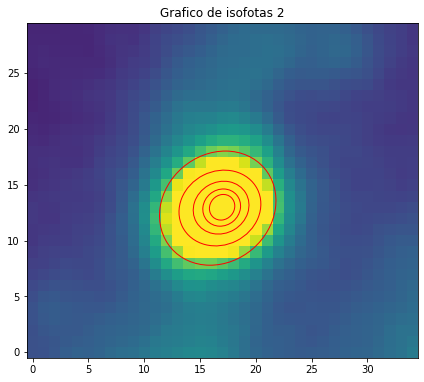

In [73]:
plt.figure(figsize=(7,7))
plt.imshow(Objeto2, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_g)+np.std(Imagen_Filtro_g))
plt.title('Grafico de isofotas 2')

for i in range(10,30,4):
    Aperturas(Isofota_imagen_2,i).plot(color='red')

# Graficamos las isofotas en función de las listas de isofotas en 
# para el segundo objeto

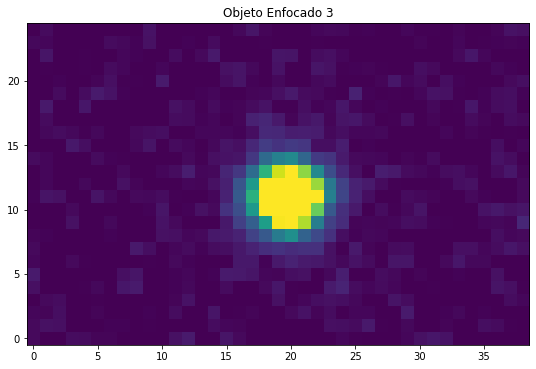

In [72]:
# Objeto filtro 3 z
Objeto3 = Imagen_Filtro_z[205:230,250:289]
plt.figure(figsize=(9,9))
plt.imshow(Objeto3, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 3')
plt.show()

(<matplotlib.patches.Ellipse at 0x1dafdf54670>,)

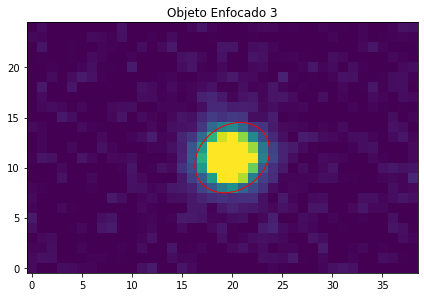

In [71]:
Elipse3 = EllipseGeometry(x0=20, y0=11, sma=4, eps=0.2,
                           pa=37.0 * np.pi / 180.0)

aper3 = EllipticalAperture((Elipse3.x0, Elipse3.y0), Elipse3.sma,
                          Elipse3.sma * (1 - Elipse3.eps),
                          Elipse3.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto3, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 3')

aper3.plot(color="red")

In [74]:
Isofota_imagen_3 = Isofotas(Objeto3,Elipse3)
Isofota_imagen_3.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int32,int32,int32,int32
0.0,1.040232355686581,0.0,0.0,0.0,0.0,0.0,0.0,None,None,19.84184236867632,0.0,10.977692394402279,0.0,1,0,0,0
0.5405222837241584,0.9604093379851275,0.00351199065867919,0.1570776109769867,0.1013973204921922,174.40203138461462,20.737468392285223,-0.19198426488514192,0.09640773627372627,0.5021647806991055,19.84184236867632,0.03250294446164771,10.977692394402279,0.028326591534057515,13,0,10,0
0.5945745120965743,0.950174132199468,0.003855486076938632,0.1543020665416641,0.10145431592464113,174.20940796703712,21.089508103748265,-0.19211674956846703,0.09621822257016616,0.5008320346158869,19.826787606280902,0.035659622493592696,10.976293993670911,0.031182623789442265,13,0,10,0
0.6540319633062317,0.938898264977161,0.004233571710998008,0.15145387954660186,0.10154727620815387,174.0134701879677,21.47478825011045,-0.19223345691008303,0.0960472672661553,0.4996386623327556,19.81032231945125,0.03912557970869235,10.974799727897397,0.03435522819437884,13,0,10,0
0.7194351596368549,0.9266238705737451,0.004645488640612844,0.15034886287351285,0.1014956372574387,173.87397802164264,21.6083112453612,-0.19212209524308863,0.0958180254867489,0.49873506410343943,19.79239476789411,0.04293495772081851,10.973321705992369,0.03774818102023846,13,0,10,0
0.7913786756005404,0.9122206980782407,0.004936769578228999,0.1429755757075292,0.08566168148857552,174.03580091724774,19.10230575827527,-0.22180887145348882,0.08583707470749749,0.38698666173727275,19.77482190131582,0.03953780761798012,10.972150563009004,0.03503861666127105,13,0,10,0
0.8705165431605945,0.8884582399612039,0.004526701121661608,0.0816210095735662,0.06839084153900932,175.54520505561743,25.860249071258014,-0.2480694589185971,0.07369981405083004,0.2970934607271196,19.77077544888328,0.032431989676727856,10.97102487106522,0.030734890774933136,13,0,11,0
0.9575681974766539,0.8598077501984565,0.0045745195562619315,0.014808497822965259,0.06114599796749139,147.08928622387984,123.14912081634144,-0.2727031224092489,0.06751449066288803,0.2475750554904473,19.776991028025584,0.029883671603207804,10.970540387722552,0.03007831279410787,13,0,15,0


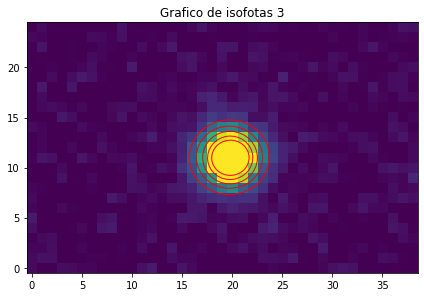

In [76]:
plt.figure(figsize=(7,7))
plt.imshow(Objeto3, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 3')

for i in range(14,23,2):
    Aperturas(Isofota_imagen_3,i).plot(color='red')
# Se repite el proceso

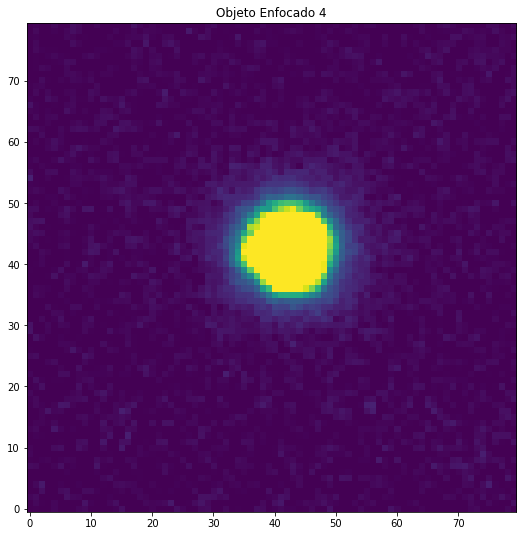

In [77]:
# Objeto 4 filtro z
Objeto4 = Imagen_Filtro_z[300:380,250:330]
plt.figure(figsize=(9,9))
plt.imshow(Objeto4, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 4')
plt.show()

(<matplotlib.patches.Ellipse at 0x1dafdf4c5e0>,)

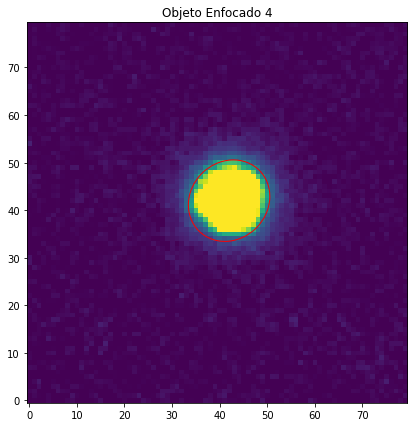

In [78]:
# Una elipse de ensayo
Elipse4 = EllipseGeometry(x0=42, y0=42, sma=9, eps=0.1,
                           pa=45.0 * np.pi / 180.0)

aper4 = EllipticalAperture((Elipse4.x0, Elipse4.y0), Elipse4.sma,
                          Elipse4.sma * (1 - Elipse4.eps),
                          Elipse4.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto4, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 4')

aper4.plot(color="red")

In [79]:
Isofota_imagen_4 = Isofotas(Objeto4,Elipse4)
Isofota_imagen_4.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int32,int32,int32,int32
0.0,9.999723937623273,0.0,0.0,0.0,0.0,0.0,0.0,None,None,42.161327273605664,0.0,42.61221645093328,0.0,1,0,0,0
0.5157769797105121,10.003580910108973,0.002088358126602819,0.03486484760583325,1.2998519343801151,162.89531625106042,1123.2943165179008,0.0024709365204943212,0.06279624417061667,None,42.161327273605664,0.3474950711479126,42.61221645093328,0.34614116820169866,13,0,1,5
0.5673546776815633,10.003703533571628,0.0024755682640872504,0.03486484760583325,1.338749063923269,162.89531625106042,1156.890587170351,0.0024366930305201907,0.06804103946098827,None,42.161327273605664,0.3936825216303721,42.61221645093328,0.3921576960047841,13,0,6,5
0.6240901454497197,10.003534706078584,0.0029604723924963527,0.03486484760583325,0.7254841267271903,162.89531625106042,626.9284526442706,0.005389026381716979,0.07402964320354762,None,42.161327273605664,0.23467453028221286,42.61221645093328,0.23376397237572588,13,0,31,5
0.6864991599946918,10.003543278105479,0.003537599645550268,0.03486484760583325,25.512360882207098,162.89531625106042,22046.62608714689,0.00016136985729370645,0.08041064897891655,None,42.161327273605664,9.077819476154106,42.61221645093328,9.042602134991787,13,0,1,5
0.755149075994161,10.003205965519353,0.0042195644576229745,0.03486484760583325,0.28975402480676327,162.89531625106042,250.39428540638806,-0.01464466624128907,0.08679335109832768,5.926618583742327,42.161327273605664,0.11341070654349458,42.61221645093328,0.11297068621916517,13,0,1,5
0.8306639835935772,10.002081332916813,0.005013032952426584,0.03486484760583325,0.07856353305881679,162.89531625106042,67.89166340634732,-0.05910448343055881,0.08968715913356437,1.517434108682073,42.161327273605664,0.03382516889913754,42.61221645093328,0.03369377400591496,13,0,1,5
0.913730381952935,9.996784106064679,0.005446346827302858,0.03486484760583325,0.07109808315333861,162.89531625106042,61.44059105300416,-0.106184744454813,0.08752038327249947,0.8242274699803401,42.161327273605664,0.03367194678839866,42.61221645093328,0.03354127860880923,13,0,3,5


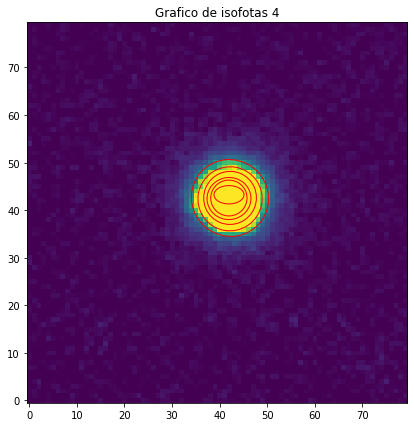

In [67]:
# Generamos la isofota para el cuarto objeto
plt.figure(figsize=(7,7))
plt.imshow(Objeto4, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 4')

for i in range(20,32,2):
    Aperturas(Isofota_imagen_4,i).plot(color='red')

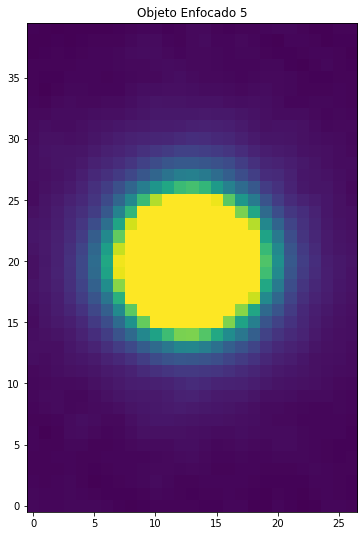

In [41]:
# Objeto 5 filtro g

Objeto5 = Imagen_Filtro_g[790:830,700:727]
plt.figure(figsize=(9,9))
plt.imshow(Objeto5, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_g)+np.std(Imagen_Filtro_g))
plt.title('Objeto Enfocado 5')
plt.show() 

(<matplotlib.patches.Ellipse at 0x1daff120580>,)

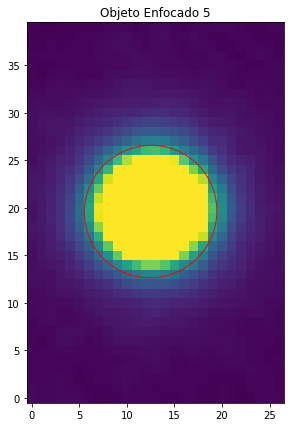

In [42]:
# Un ejemplo de prueba
Elipse5 = EllipseGeometry(x0=12.5, y0=19.6, sma=7, eps=0.01,
                           pa=45.0 * np.pi / 180.0)

aper5 = EllipticalAperture((Elipse5.x0, Elipse5.y0), Elipse5.sma,
                          Elipse5.sma * (1 - Elipse5.eps),
                          Elipse5.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto5, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_g)+np.std(Imagen_Filtro_g))
plt.title('Objeto Enfocado 5')

aper5.plot(color="red")


In [80]:
Isofota_imagen_5 = Isofotas(Objeto5,Elipse5)
Isofota_imagen_5.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int32,int32,int32,int32
0.0,6.5132962966663746,0.0,0.0,0.0,0.0,0.0,0.0,None,None,12.908699844034235,0.0,20.044131696489224,0.0,1,0,0,0
0.5339437911069824,6.153415202613005,0.01189355292497046,0.06282344590930206,0.09029744923807355,176.46214974542062,43.92978785132087,-0.8210928239203348,0.3287529886816065,0.40038468137130284,12.908699844034235,0.025742309574088695,20.044131696489224,0.02488547172442471,13,0,14,0
0.5873381702176806,6.0940472174953175,0.01054903537565462,0.019410017703020407,0.07368634980815478,167.0989149180733,113.4863595994914,-0.8441652693616378,0.26609019985548615,0.3152110250362526,12.900035398898845,0.0220996857658393,20.038232342983733,0.022323515017295688,13,0,20,0
0.6460719872394487,6.0507780810648155,0.011423079579201845,0.03685469423584581,0.07241771248610734,167.88052945780427,59.264008761049624,-0.8336259350384463,0.25899768043101523,0.31068812706633275,12.886218933612101,0.02430402896445722,20.05060054793524,0.024154533102565434,13,0,12,0
0.7106791859633936,5.999950741852577,0.015645936816086937,0.026526333670704873,0.09171043590318011,16.187014574702577,103.725722892474,-0.8293307640072889,0.3253054605286255,0.392250564728558,12.873395528278882,0.0335163849401249,20.05348059825662,0.03362725795695807,13,0,10,0
0.7817471045597331,5.941727473031112,0.013674919606094542,0.03852393688088622,0.07232064899926981,170.06577897421175,56.66598460905957,-0.8245230847086141,0.25666404709140483,0.31128788490150006,12.859407207310543,0.029419213953717622,20.056715051148398,0.02918534339589105,13,0,10,0
0.8599218150157064,5.882188605272238,0.01690626451729045,0.037491701699256266,0.07593553538105713,174.758380296615,61.1048061940282,-0.8820129296206705,0.2759970233210379,0.3129172079594532,12.847381591489365,0.0339492627571881,20.071558492629684,0.03370106883414375,13,0,12,0
0.9459139965172771,5.799266860186685,0.01701835400617989,0.023953801995726734,0.05966274734003448,146.1175727777763,74.6286328615888,-1.0424535689073178,0.24073499465476683,0.23093114344373264,12.842334246385752,0.02899487195438114,20.075659542587893,0.029066628150495145,13,0,11,0


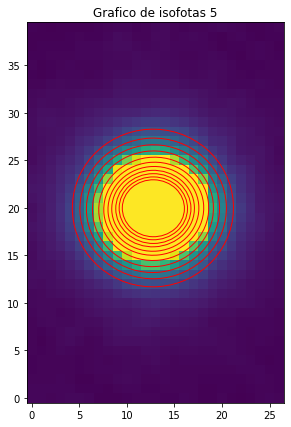

In [81]:
# Generamos la isofota para el quinto objeto
plt.figure(figsize=(7,7))
plt.imshow(Objeto5, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 5')

for i in range(20,31,1):
    Aperturas(Isofota_imagen_5,i).plot(color='red')

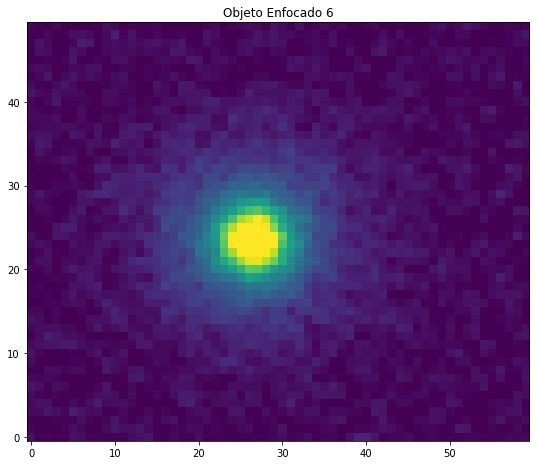

In [44]:
# Objeto 6 
Objeto6 = Imagen_Filtro_z[370:420,560:620]
plt.figure(figsize=(9,9))
plt.imshow(Objeto6, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 6')
plt.show() 

(<matplotlib.patches.Ellipse at 0x1daff480970>,)

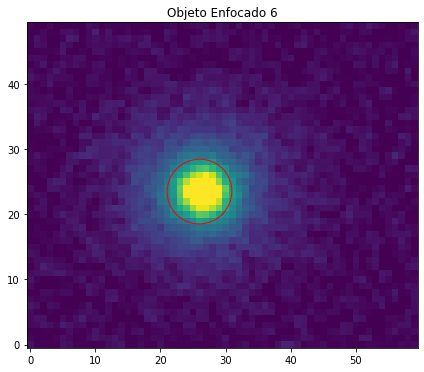

In [45]:
Elipse6 = EllipseGeometry(x0=26, y0=23.5, sma=5, eps=0.01,
                           pa=45.0 * np.pi / 180.0)

aper6 = EllipticalAperture((Elipse6.x0, Elipse6.y0), Elipse6.sma,
                          Elipse6.sma * (1 - Elipse6.eps),
                          Elipse6.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto6, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 6')

aper6.plot(color="red")

In [88]:
Isofota_imagen_6 = Isofotas(Objeto6,Elipse6)
Isofota_imagen_6.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int32,int32,int32,int32
0.0,0.6101794413805103,0.0,0.0,0.0,0.0,0.0,0.0,None,None,26.423307341174638,0.0,23.92481433165471,0.0,1,0,0,0
0.5076279899738527,0.6085688783712929,0.0001732106301932835,0.7582293103536525,0.022180593191439363,1.11890793029824,1.3951551777996154,-0.013201340142672277,0.00943536842720957,0.714728074971002,26.423307341174638,0.0233001713357017,23.92481433165471,0.0058274760636396715,13,0,23,0
0.5583907889712381,0.6068224991215708,0.0002688064731999992,0.6288950848554391,0.02905676628413156,1.11890793029824,1.9950735098066212,-0.02178401623074344,0.011595528405633923,0.5322952518401697,26.468988095389022,0.02187613367105496,23.875747581456967,0.008382908146697864,13,0,22,0
0.6142298678683619,0.6023083903755064,0.0007874405761426881,0.28650928405724485,0.07667934737633869,1.6737310926754019,9.247792101776724,-0.041993897804448156,0.020605638291017112,0.4906817268301892,26.47221326416774,0.03302917479234157,23.76381585693576,0.02431590151881603,13,0,50,2
0.6756528546551981,0.5967282494025308,0.0009285598563961167,0.02466095092746476,0.10166961683044201,105.46122590101264,123.57017835806775,-0.04681475665450834,0.020647420321645127,0.44104512758706704,26.49771721027256,0.035437566469110705,23.650588268564526,0.03526070857786414,13,0,11,0
0.743218140120718,0.5939584932549246,0.0010810875244813,0.03236213037317817,0.07623715237381941,105.46122590101264,70.88320428097187,-0.06561135346876297,0.02046882277288099,0.31197074424971327,26.508714660250238,0.029245930740109383,23.638865435026478,0.029300510424592554,13,0,10,0
0.8175399541327898,0.5899973181348315,0.0010814633791280857,0.05768218843869928,0.06394932278840794,103.98942652841147,33.79362509906263,-0.06928058105821536,0.017587094225237083,0.25385315706949585,26.5193395627329,0.02702655311272435,23.63269543732084,0.027717438390001892,13,0,10,0
0.8992939495460688,0.5850544813746977,0.0010711296197619584,0.06179959628679499,0.05582959780800195,96.12257711340735,27.595830125241605,-0.07068374087781402,0.016013457743047802,0.2265507957583786,26.527183958998194,0.025920679451370235,23.643312764266465,0.026770621239064995,13,0,50,2


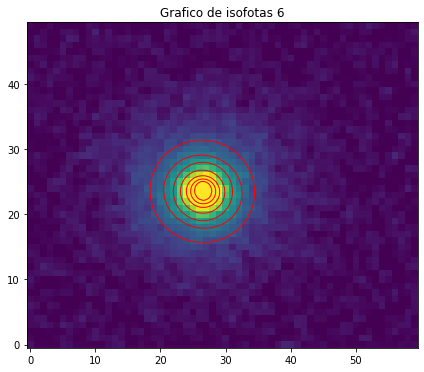

In [87]:
# Generamos la isofota para el sexto objeto
plt.figure(figsize=(7,7))
plt.imshow(Objeto6, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 6')

for i in range(12,31,3):
    Aperturas(Isofota_imagen_6,i).plot(color='red')

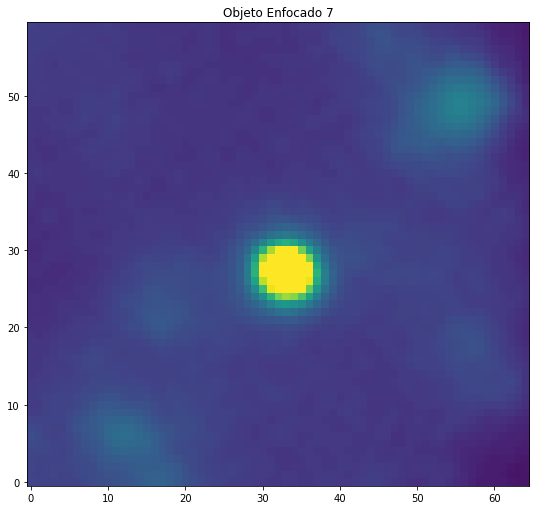

In [48]:
# Objeto 7 
Objeto7 = Imagen_Filtro_r[420:480,900:965]
plt.figure(figsize=(9,9))
plt.imshow(Objeto7, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_r)+np.std(Imagen_Filtro_r))
plt.title('Objeto Enfocado 7')
plt.show() 

(<matplotlib.patches.Ellipse at 0x1daff70c700>,)

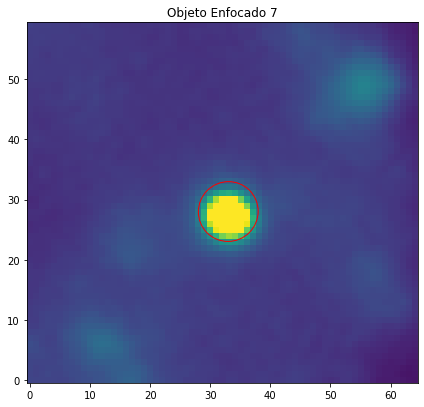

In [49]:
# De nuevo, generamos una elipse de ensayo

Elipse7 = EllipseGeometry(x0=33, y0=28, sma=5, eps=0.01,
                           pa=45.0 * np.pi / 180.0)

aper7 = EllipticalAperture((Elipse7.x0, Elipse7.y0), Elipse7.sma,
                          Elipse7.sma * (1 - Elipse7.eps),
                          Elipse7.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto7, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_r)+np.std(Imagen_Filtro_r))
plt.title('Objeto Enfocado 7')

aper7.plot(color="red")

In [89]:
Isofota_imagen_7 = Isofotas(Objeto7,Elipse7)
Isofota_imagen_7.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int32,int32,int32,int32
0.0,1.2256479084442566,0.0,0.0,0.0,0.0,0.0,0.0,None,None,32.98903359445683,0.0,27.35938274204666,0.0,1,0,0,0
0.5076279899738527,1.215255557614724,0.000515151057646199,0.7871535114743546,0.024485894927112197,92.01356611375431,1.5183252420919444,-0.03135163413683481,0.020949136550098273,0.6681991904685212,32.98903359445683,0.0065143020772336566,27.35938274204666,0.029208188545634402,13,0,10,0
0.5583907889712381,1.213429786270613,0.0005753793326102402,0.7805455820284353,0.025137692251226113,91.90980722434507,1.5635208252256794,-0.03193408158199197,0.021088556815286996,0.6603777459871931,32.98645381649746,0.007317857599706557,27.398000672689797,0.03199647115894943,13,0,10,0
0.6142298678683619,1.2080177220636943,0.0009061308223839761,0.7161645813499277,0.026464834423765134,91.90980722434507,1.7042137522337677,-0.05605303637249437,0.03071000311871988,0.5478740333465593,32.98098290076037,0.008439429032553838,27.41585413316027,0.028646171869654548,13,0,10,0
0.6756528546551981,1.1957656898060263,0.0013244304191136586,0.5588066090955628,0.032841167916109984,91.90980722434507,2.4144141541709665,-0.09324440533767382,0.035405138400673886,0.37970254914982055,32.96483662491342,0.011475522142802725,27.415315739236355,0.025157791978056735,13,0,16,0
0.743218140120718,1.1764152992609147,0.0012428625101496148,0.33976962046091774,0.03351227673361948,95.39195504712036,3.5173102349776775,-0.11695134291841887,0.035471752098781936,0.3033035039497219,32.94325951164253,0.012919793895922795,27.422758481474766,0.018831617012316233,13,0,12,0
0.8175399541327898,1.1499228095239091,0.002436154494649415,0.055360583190882426,0.05705822640578494,120.93586818420114,31.379920779307263,-0.15226751947456646,0.0368245283589747,0.24184099462607697,32.91535228974348,0.024244390630037214,27.40026104253535,0.02454521694856898,13,0,50,2
0.8992939495460688,1.137474331435194,0.001768778269044894,0.055360583190882426,0.037096332979948764,120.93586818420114,20.401524856639597,-0.17762017954978232,0.03367999262699853,0.18961805304086465,32.91535228974348,0.017338565249773365,27.40026104253535,0.0175538847869416,13,0,14,0


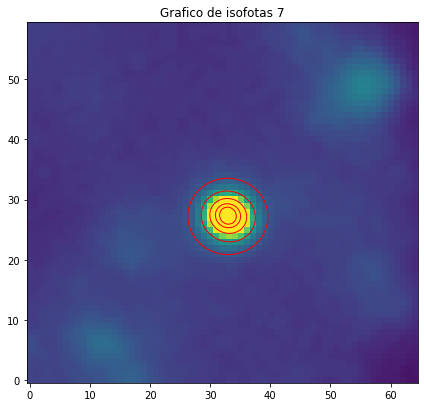

In [90]:
# Generamos las isofota para el septimo objeto
plt.figure(figsize=(7,7))
plt.imshow(Objeto7, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_r)+np.std(Imagen_Filtro_r))
plt.title('Grafico de isofotas 7')

for i in range(12,31,4):
    Aperturas(Isofota_imagen_7,i).plot(color='red')

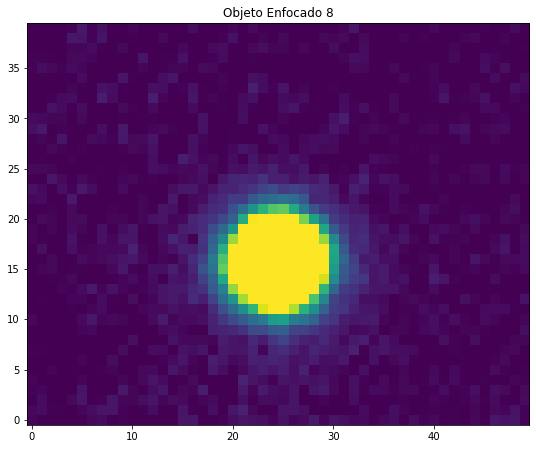

In [51]:
# Objeto 8
Objeto8 = Imagen_Filtro_z[860:900,600:650]
plt.figure(figsize=(9,9))
plt.imshow(Objeto8, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 8')
plt.show() 

(<matplotlib.patches.Ellipse at 0x1daff853d90>,)

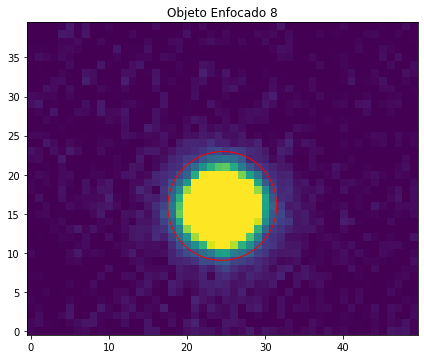

In [52]:
# Otra elipse de prueba 
Elipse8 = EllipseGeometry(x0=24.5, y0=16, sma=7, eps=0.01,
                           pa=45.0 * np.pi / 180.0)

aper8 = EllipticalAperture((Elipse8.x0, Elipse8.y0), Elipse8.sma,
                          Elipse8.sma * (1 - Elipse8.eps),
                          Elipse8.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto8, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 8')

aper8.plot(color="red")

In [91]:
Isofota_imagen_8 = Isofotas(Objeto8,Elipse8)
Isofota_imagen_8.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int32,int32,int32,int32
0.0,10.107870310276667,0.0,0.0,0.0,0.0,0.0,0.0,None,None,24.650449977063445,0.0,15.904580706791524,0.0,1,0,0,0
0.5339437911069824,9.85872197727889,0.022334008189082665,0.5261096744983998,0.06865976765308406,2.345237662743916,5.2420021740024625,-1.0259152676724879,0.7265414397171266,0.7081885440358481,24.650449977063445,0.038700808510400565,15.904580706791524,0.01897580582291216,13,0,10,0
0.5873381702176806,9.816108998638605,0.023777266029615964,0.5283186017149166,0.06129006602275233,2.2874018788875365,4.66713575972429,-1.1069381212718206,0.6857548814375692,0.6195060665628433,24.611540506756008,0.038169761459684176,15.894753794483517,0.018622377837139655,13,0,10,0
0.6460719872394487,9.659877250473336,0.028332740350959725,0.38064598409822614,0.06251933414160343,1.9630769616812667,6.00515313306445,-1.539311760481592,0.6923522439641869,0.44978039000207226,24.582904616371245,0.032625937360105994,15.847520286540533,0.020863438375116346,13,0,11,0
0.7106791859633936,9.42782804767704,0.031556185299249605,0.19209026712079727,0.05861220235691233,0.4781486753845774,9.992531078606234,-2.1721469925361347,0.6485903942556295,0.2985941543018479,24.562304427304593,0.025803608198163134,15.792147211015179,0.021498057444697776,13,0,11,0
0.7817471045597331,9.176346686020922,0.034138585299944756,0.0448384029074059,0.05945766848097935,8.101362940515205,40.15626094315583,-2.492631273223023,0.6667741308183007,0.26749810049367956,24.5583022414166,0.02434623955258516,15.740857059401916,0.023994531739042993,13,0,10,0
0.8599218150157064,8.950665930009087,0.042449310495016365,0.001712055968078531,0.057481328300179074,71.4814943964118,994.7836771374934,-3.045019536398702,0.6435531907180523,0.2113461615025212,24.55532745878074,0.02543700823466965,15.743488839603668,0.024853496126498443,13,0,10,0
0.9459139965172771,8.753890720827734,0.03875239518717806,0.04214078387951277,0.04976706732589495,62.89002038527373,35.714943245706905,-2.801062434419903,0.5826392307329767,0.20800651337628634,24.559888956438282,0.024358179985066664,15.738558406763918,0.024533443300655412,13,0,25,0


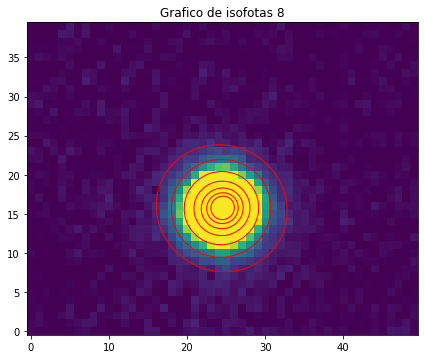

In [92]:
# Generamos la isofota para el octavo objeto
plt.figure(figsize=(7,7))
plt.imshow(Objeto8, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 8')

for i in range(12,31,3):
    Aperturas(Isofota_imagen_8,i).plot(color='red')

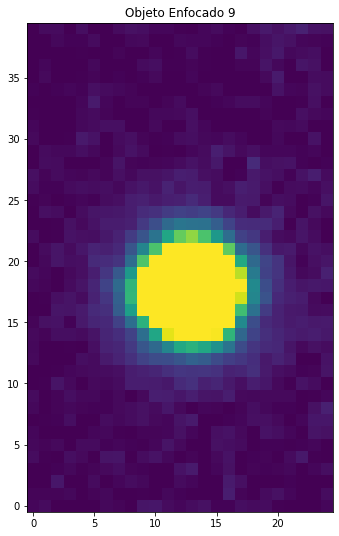

In [54]:
# Objeto 9 
Objeto9 = Imagen_Filtro_z[520:560,375:400]
plt.figure(figsize=(9,9))
plt.imshow(Objeto9, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 9')
plt.show() 


(<matplotlib.patches.Ellipse at 0x1daff75ba00>,)

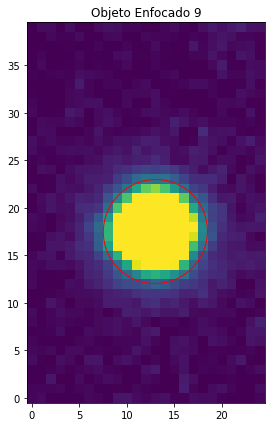

In [55]:
# Otra elipse de ensayo

Elipse9 = EllipseGeometry(x0=13, y0=17.5, sma=5.5, eps=0.01,
                           pa=45.0 * np.pi / 180.0)

aper9 = EllipticalAperture((Elipse9.x0, Elipse9.y0), Elipse9.sma,
                          Elipse9.sma * (1 - Elipse9.eps),
                          Elipse9.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto9, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Objeto Enfocado 9')

aper9.plot(color="red")

In [93]:
Isofota_imagen_9 = Isofotas(Objeto9,Elipse9)
Isofota_imagen_9.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int32,int32,int32,int32
0.0,5.36482894805991,0.0,0.0,0.0,0.0,0.0,0.0,None,None,13.005759906270285,0.0,17.674896144903123,0.0,1,0,0,0
0.5076279899738527,5.19144563204415,0.010584000795007117,0.5998455901625926,0.056813965214807506,91.02773224054724,4.010760134339762,-0.5209829857562308,0.3685788067400637,0.7074680302756041,13.005759906270285,0.01491278354619229,17.674896144903123,0.03606772311164116,13,0,10,0
0.5583907889712381,5.168283086328722,0.011624376877254913,0.6002803791446499,0.05683324445876711,91.0126288529193,4.007842732847337,-0.5203552931295065,0.36803816698141484,0.7072824507423954,13.006249742866935,0.016337546546044683,17.642477186610662,0.0397457694984223,13,0,10,0
0.6142298678683619,5.141296049681951,0.012752704818484673,0.596638289908294,0.047606885271792375,90.93100337866963,3.3662681397440153,-0.6251001280474645,0.34508003598312076,0.5520396181344542,13.007321356826882,0.015100941358603287,17.60628459744453,0.03627608751366268,13,0,10,0
0.6756528546551981,5.043842228671209,0.013797561394155765,0.4628920108426851,0.04867780189136269,90.70048167205216,4.050717141645773,-0.8000904514623938,0.3346114487274233,0.4182170254823381,13.015962123683703,0.016976521347640994,17.596030455369807,0.030642424268980995,13,0,10,0
0.743218140120718,4.910421314256405,0.012887432181493732,0.30487974858880873,0.04041546124613183,87.72593874336313,4.62730294765546,-1.06060312932587,0.28205185681742845,0.2659353428428063,13.020735682108684,0.01550511280901375,17.58396323060079,0.021605151376647768,13,0,10,0
0.8175399541327898,4.751836025954143,0.012854611301573098,0.14736001514846636,0.038623241790557226,89.1376948946134,8.37651901895047,-1.2305955237188961,0.2668802735987508,0.21687083079274552,13.021650912841688,0.01629683479311702,17.580867109114067,0.018532699712225646,13,0,15,0
0.8992939495460688,4.573460790351499,0.008878152873590716,0.016822144808270142,0.024287046554834733,47.858041453693744,43.08586209238591,-1.420305142230605,0.16384178557170026,0.11535675025043204,13.027945968525104,0.01120190972762545,17.574808755097727,0.011185936550306246,13,0,12,0


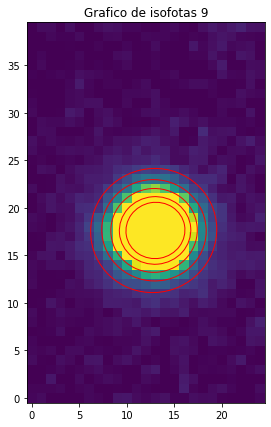

In [94]:
# Generamos la isofota para el noveno objeto
Isofota_imagen_9 = Isofotas(Objeto9,Elipse9)
plt.figure(figsize=(7,7))
plt.imshow(Objeto9, origin='lower',vmin= 0, vmax=np.mean(Imagen_Filtro_z)+np.std(Imagen_Filtro_z))
plt.title('Grafico de isofotas 9')

for i in range(20,29,2):
    Aperturas(Isofota_imagen_9,i).plot(color='red')